In [4]:
import pandas as pd

dataFrame = pd.read_csv('classified_data', index_col=0)
dataFrame.head(5)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [11]:
from sklearn.preprocessing import StandardScaler

scalarObj = StandardScaler()
standard_features = scalarObj.fit_transform(dataFrame.drop(['TARGET CLASS'], axis=1))
standard_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [15]:
newDataframe = pd.DataFrame(standard_features, columns=dataFrame.columns[:-1])
newDataframe['TARGET CLASS'] = pd.to_numeric(dataFrame['TARGET CLASS'])
newDataframe.head()


,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314,1
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759,0
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850,0
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987,1
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510,1


In [1]:
from pycaret.classification import *

In [16]:
exp_clf = setup(data = newDataframe, target = 'TARGET CLASS', session_id=121)
exp_clf

 
Setup Succesfully Completed!


,Description,Value
0,session_id,121
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(1000, 11)"
4,Missing Values,False
5,Numeric Features,10
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


(          WTT       PTI       EQW  ...       PJF       HQE       NXJ
 0   -0.123542  0.185907 -0.913431  ... -1.482368 -0.949719 -0.643314
 1   -1.084836 -0.430348 -1.025313  ... -0.202240 -1.828051  0.636759
 2   -0.788702  0.339318  0.301511  ...  0.285707 -0.682494 -0.377850
 3    0.982841  1.060193 -0.621399  ...  1.066491  1.241325 -1.026987
 4    1.139275 -0.640392 -0.709819  ... -1.472352  1.040772  0.276510
 ..        ...       ...       ...  ...       ...       ...       ...
 995  0.211653 -0.312490  0.065163  ... -2.604264 -0.139347 -0.069602
 996 -1.292453 -0.616901  0.369613  ... -1.242110 -0.679746  1.473448
 997  0.641777 -0.513083 -0.179205  ... -2.362494 -0.814261  0.111597
 998  0.467072 -0.982786 -1.465194  ... -0.036777  0.406025 -0.855670
 999 -0.387654 -0.595894 -1.431398  ... -0.567789  0.336997  0.010350
 
 [1000 rows x 10 columns], 0      1
 1      0
 2      0
 3      1
 4      1
       ..
 995    1
 996    0
 997    1
 998    1
 999    1
 Name: TARGET CLASS, L

In [17]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Quadratic Discriminant Analysis,0.944200,0.986200,0.948600,0.941400,0.944600,0.888400
1,Extra Trees Classifier,0.942800,0.985200,0.954300,0.933700,0.943500,0.885500
2,Ridge Classifier,0.939900,0.000000,0.957100,0.927200,0.941400,0.879900
3,Linear Discriminant Analysis,0.939900,0.988800,0.957100,0.927200,0.941400,0.879900
4,Naive Bayes,0.938500,0.988000,0.942900,0.936800,0.939100,0.877000
5,Logistic Regression,0.937100,0.988900,0.948600,0.928700,0.937900,0.874100
6,K Neighbors Classifier,0.932800,0.977200,0.942900,0.925600,0.933300,0.865600
7,SVM - Linear Kernel,0.932800,0.000000,0.937100,0.932200,0.933100,0.865600
8,Ada Boost Classifier,0.927100,0.976800,0.928600,0.927000,0.926900,0.854200
9,CatBoost Classifier,0.927100,0.982900,0.942900,0.914900,0.928400,0.854100


In [18]:
help(create_model)

Help on function create_model in module pycaret.classification:

create_model(estimator=None, ensemble=False, method=None, fold=10, round=4, verbose=True)
    Description:
    ------------
    This function creates a model and scores it using Stratified Cross Validation. 
    The output prints a score grid that shows Accuracy, AUC, Recall, Precision, 
    F1 and Kappa by fold (default = 10 Fold). 
    
    This function returns a trained model object. 
    
    setup() function must be called before using create_model()
    
        Example
        -------
        from pycaret.datasets import get_data
        juice = get_data('juice')
        experiment_name = setup(data = juice,  target = 'Purchase')
        
        lr = create_model('lr')
    
        This will create a trained Logistic Regression model.
    
    Parameters
    ----------
    estimator : string, default = None
    
    Enter abbreviated string of the estimator class. All estimators support binary or 
    multiclass 

In [19]:
tuned_qda = tune_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9714,0.9984,1.0000,0.9459,0.9722,0.9429
1,0.9714,0.9902,0.9714,0.9714,0.9714,0.9429
2,0.9429,0.9910,0.9143,0.9697,0.9412,0.8857
3,0.9286,0.9804,0.9429,0.9167,0.9296,0.8571
4,0.9429,0.9812,0.9429,0.9429,0.9429,0.8857
5,0.9429,0.9918,0.9429,0.9429,0.9429,0.8857
6,0.9000,0.9755,0.9429,0.8684,0.9041,0.8000
7,0.9429,0.9829,0.9429,0.9429,0.9429,0.8857
8,0.9143,0.9837,0.9714,0.8718,0.9189,0.8286
9,0.9710,0.9950,0.9714,0.9714,0.9714,0.9420


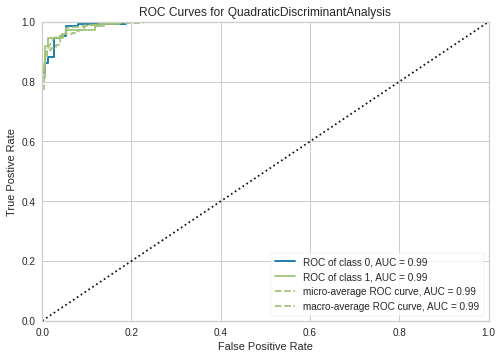

In [20]:
plot_model(tuned_qda, plot='auc')

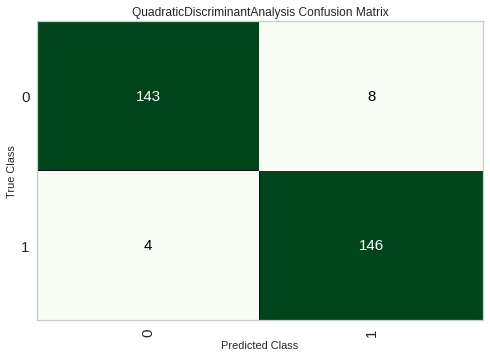

In [21]:
plot_model(tuned_qda, plot='confusion_matrix')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

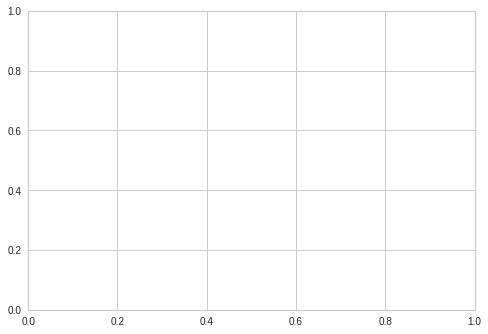

In [25]:
evaluate_model(tuned_qda)

In [26]:
predict_model(tuned_qda)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Quadratic Discriminant Analysis,0.9601,0.994,0.9733,0.9481,0.9605,0.9203


,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS,Label,Score
0,0.245865,-0.188548,-0.461846,0.053811,1.421099,-2.025763,-0.492707,-0.473665,0.630389,0.356074,1,1,0.9653
1,1.047297,2.130779,0.302225,0.840850,1.568143,1.511576,-0.259417,0.723631,-1.434843,-0.831651,0,0,0.0039
2,-1.150811,-0.926524,-1.004525,0.258864,0.990658,0.931735,-0.580843,-0.901803,0.914915,0.418193,0,1,0.9281
3,-0.615758,0.807265,1.040060,-0.960044,1.518234,-0.592469,1.198214,-0.121572,-1.032173,0.604672,0,0,0.0068
4,-2.047719,0.637037,1.224101,0.975213,0.607648,-0.491839,0.845373,1.031077,-0.065230,0.468121,0,0,0.0022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,-1.614986,-0.284051,1.239179,0.081736,-0.020249,-0.605947,-0.975313,-0.343572,-1.180753,1.470396,0,0,0.0231
297,0.672096,0.240860,0.733200,0.351921,-2.125017,1.706066,-1.582502,-0.518245,-1.712470,0.368032,0,0,0.1541
298,-0.502621,1.433134,-0.336294,-0.333804,-1.009527,-1.110735,-1.229405,0.671507,-0.840314,0.061310,0,0,0.1375
299,0.230527,0.230725,-0.724440,0.214368,-0.158763,-0.552070,-0.693787,-1.153712,1.276232,0.986750,1,1,0.9905


In [27]:
findal_model = finalize_model(tuned_qda)

In [28]:
save_model(findal_model, 'Quadratic Discriminant Analysis - Model')

Transformation Pipeline and Model Succesfully Saved
